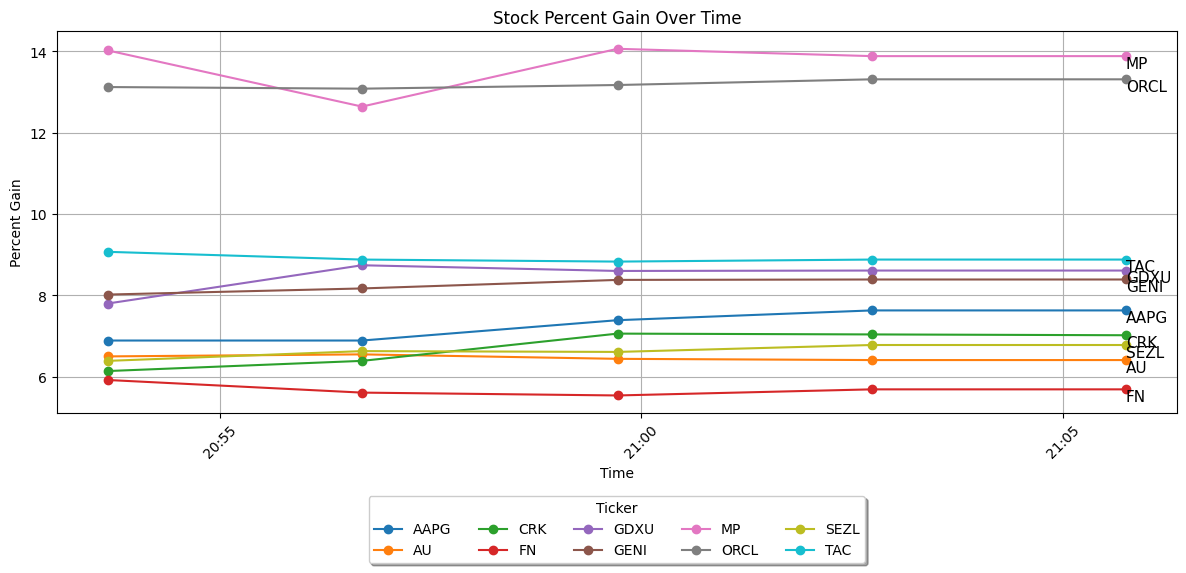

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv("data_log.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['percent_gain'] = df['percent_gain'].astype(float)

pivot_df = df.pivot(index='timestamp', columns='ticker', values='percent_gain')

plt.figure(figsize=(12, 6))
for ticker in pivot_df.columns:
    # Assign the label here so it registers with the legend
    plt.plot(pivot_df.index, pivot_df[ticker], marker='o', label=ticker)
    
    # Label the last valid data point
    last_valid_index = pivot_df[ticker].last_valid_index()
    if last_valid_index is not None:
        last_value = pivot_df.at[last_valid_index, ticker]
        plt.text(last_valid_index, last_value, ticker, fontsize=11,
                 verticalalignment='top', horizontalalignment='left')

# Now this will work because labels were assigned
plt.legend(title="Ticker", loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.legend(title="Ticker", loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=5, fancybox=True, shadow=True)

plt.title("Stock Percent Gain Over Time")
plt.xlabel("Time")
plt.ylabel("Percent Gain")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.savefig("stock_percent_gain_timeseries.png")
plt.show()



